# Dexplot

Dexplot is a Python library for delivering beautiful data visualizations with a simple and intuitive user experience.

## Goals

The primary goals for dexplot are:

* Maintain a very consistent API with as few functions as necessary to make the desired statistical plots
* Allow the user tremendous power without using matplotlib


## Installation

`pip install dexplot`

## Built for long and wide data

Dexplot is primarily built for long data, which is a form of data where each row represents a single observation and each column represents a distinct quantity. It is often referred to as "tidy" data. Here, we have some long data.

![](../docs/images/long.png)

Dexplot also has the ability to handle wide data, where multiple columns may contain values that represent the same kind of quantity. The same data above has been aggregated to show the mean for each combination of neighborhood and property type. It is now wide data as each column contains the same quantity (price).

![](../docs/images/wide.png)

## Usage

Dexplot provides a small number of powerful functions that all work similarly. Most plotting functions have the following signature:

```python
dxp.plotting_func(x, y, data, aggfunc, split, row, col, orientation, ...)
```

* `x` - Column name along the x-axis
* `y` - Column name the y-axis
* `data` - Pandas DataFrame
* `aggfunc` - String of pandas aggregation function, 'min', 'max', 'mean', etc...
* `split` - Column name to split data into distinct groups
* `row` - Column name to split data into distinct subplots row-wise
* `col` - Column name to split data into distinct subplots column-wise
* `orientation` - Either vertical (`'v'`) or horizontal (`'h'`). Default for most plots is vertical.

When `aggfunc` is provided, `x` will be the grouping variable and `y` will be aggregated when vertical and vice-versa when horizontal. The best way to learn how to use dexplot is with the examples below.

## Families of plots

There are two primary families of plots, **aggregation** and **distribution**. Aggregation plots take a sequence of values and return a **single** value using the function provided to `aggfunc` to do so. Distribution plots take a sequence of values and depict the shape of the distribution in some manner.

* Aggregation
    * bar
    * line
    * scatter
    * count
* Distribution
    * box
    * violin
    * hist
    * kde

## Comparison with Seaborn

If you have used the seaborn library, then you should notice a lot of similarities. Much of dexplot was inspired by Seaborn. Below is a list of the extra features in dexplot not found in seaborn

* Ability to graph relative frequency and normalize over any number of variables
* No need for multiple functions to do the same thing (far fewer public functions)
* Ability to make grids with a single function instead of having to use a higher level function like `catplot`
* Pandas `groupby` methods available as strings
* Ability to sort by values
* Ability to sort x/y labels lexicographically
* Ability to select most/least frequent groups
* x/y labels are wrapped so that they don't overlap
* Figure size (plus several other options) and available to change without using matplotlib
* A matplotlib figure object is returned

## Examples

Most of the examples below use long data.

## Aggregating plots - bar, line and scatter

We'll begin by covering the plots that **aggregate**. An aggregation is defined as a function that summarizes a sequence of numbers with a single value. The examples come from the Airbnb dataset, which contains many property rental listings from the Washington D.C. area.

In [2]:
import dexplot as dxp
import pandas as pd
airbnb = dxp.load_dataset('airbnb')
airbnb.head()

,neighborhood,property_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,rating,superhost,response_time,latitude,longitude
0,Shaw,Townhouse,16,3.5,4,433,250,95.0,No,within an hour,38.90982,-77.02016
1,Brightwood Park,Townhouse,4,3.5,4,154,50,97.0,No,NaN,38.95888,-77.02554
2,Capitol Hill,House,2,1.5,1,83,35,97.0,Yes,within an hour,38.88791,-76.99668
3,Shaw,House,2,2.5,1,475,0,98.0,No,NaN,38.91331,-77.02436
4,Kalorama Heights,Apartment,3,1.0,1,118,15,91.0,No,within an hour,38.91933,-77.04124


There are more than 4,000 listings in our dataset. We will use bar charts to aggregate the data.

In [3]:
airbnb.shape

(4581, 12)

### Vertical bar charts

In order to performa an aggregation, you must supply a value for `aggfunc`. Here, we find the median price per neighborhood. Notice that the column names automatically wrap.

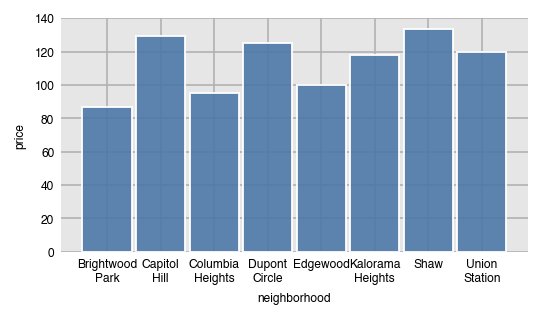

In [59]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median')

Line and scatter plots can be created with the same command, just substituting the name of the function. They both are not good choices for the visualization since the grouping variable (neighborhood) has no meaningful order.

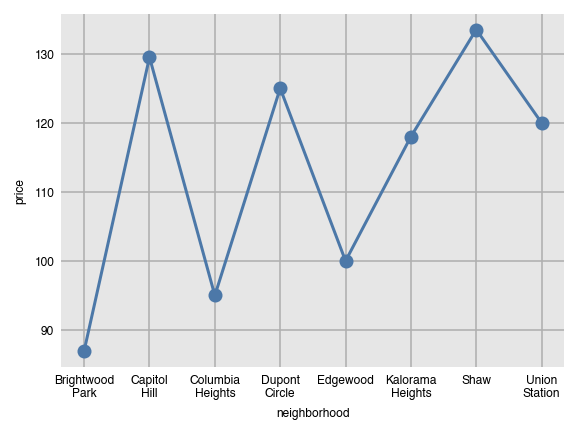

In [5]:
dxp.line(x='neighborhood', y='price', data=airbnb, aggfunc='median')

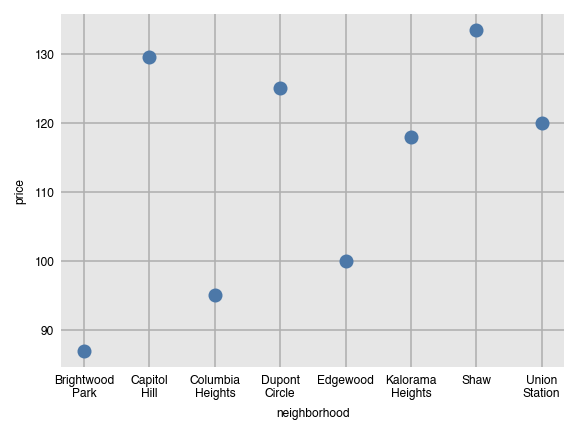

In [6]:
dxp.scatter(x='neighborhood', y='price', data=airbnb, aggfunc='median')

### Components of the groupby aggregation

Anytime the `aggfunc` parameter is set, you have performed a groupby aggregation, which always consists of three components:

* Grouping column - unique values of this column form independent groups (neighborhood)
* Aggregating column - the column that will get summarized with a single value (price)
* Aggregating function - a function that returns a single value (median)

The general format for doing this in pandas is:

```python
df.groupby('grouping column').agg({'aggregating column': 'aggregating function'})
```

Specifically, the following code is executed within dexplot.

In [7]:
airbnb.groupby('neighborhood').agg({'price': 'median'})

,price
neighborhood,
Brightwood Park,87.0
Capitol Hill,129.5
Columbia Heights,95.0
Dupont Circle,125.0
Edgewood,100.0
Kalorama Heights,118.0
Shaw,133.5
Union Station,120.0


### Number and percent of missing values with  `'countna'` and `'percna'`

In addition to all the common aggregating functions, you can use the strings `'countna'` and `'percna'` to get the number and percentage of missing values per group.

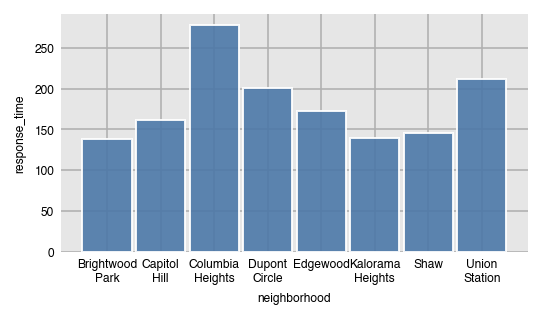

In [8]:
dxp.bar(x='neighborhood', y='response_time', data=airbnb, aggfunc='countna')

### Sorting the bars by values

By default, the bars will be sorted by the grouping column (x-axis here) in alphabetical order. Use the `sort_values` parameter to sort the bars by value.

* None - sort x/y axis labels alphabetically (default)
* `asc` - sort values from least to greatest
* `desc` - sort values from greatest to least

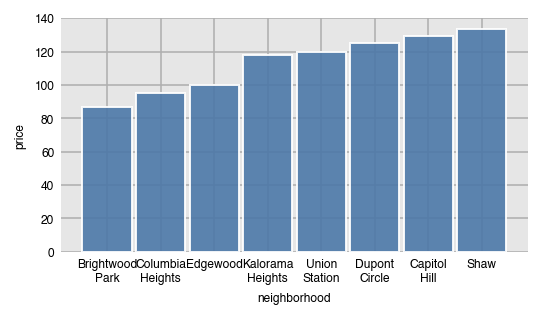

In [9]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', sort_values='asc')

Here, we sort the values from greatest to least.

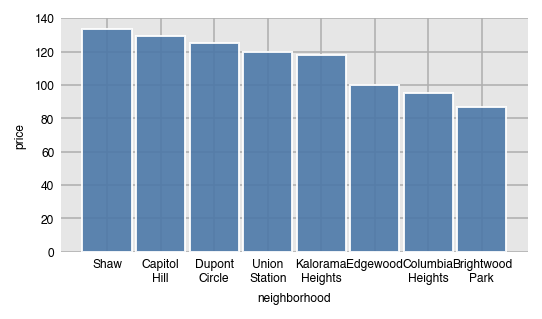

In [10]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', sort_values='desc')

### Specify order with `x_order`

Specify a specific order of the labels on the x-axis by passing a list of values to `x_order`. This can also act as a filter to limit the number of bars.

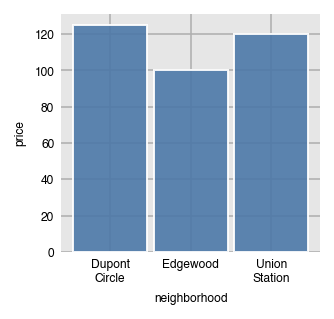

In [11]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median',
        x_order=['Dupont Circle', 'Edgewood', 'Union Station'])

By default, `x_order` and all of the `_order` parameters are set to `'asc'` by default, which will order them alphabetically. Use the string `'desc'` to sort in the opposite direction.

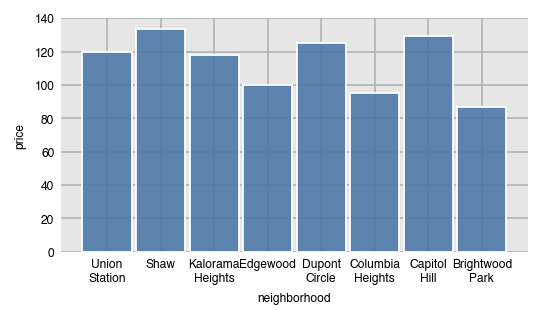

In [12]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', x_order='desc')

### Filter for the neighborhoods with most/least frequency of occurrence

You can use `x_order` again to filter for the x-values that appear the most/least often by setting it to the string `'top n'` or `'bottom n'` where `n` is an integer. Here, we filter for the top 4 most frequently occurring neighborhoods. This option is useful when there are dozens of unique values in the grouping column.

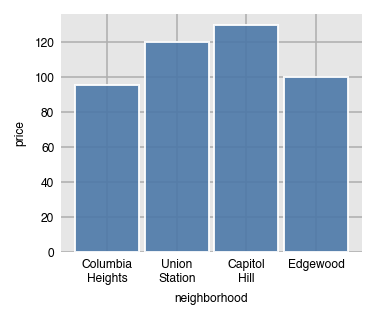

In [13]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median',
        x_order='top 4')

We can verify that the four neighborhoods are the most common.

In [14]:
airbnb['neighborhood'].value_counts()

Columbia Heights    773
Union Station       713
Capitol Hill        654
Edgewood            610
Dupont Circle       549
Shaw                514
Brightwood Park     406
Kalorama Heights    362
Name: neighborhood, dtype: int64

### Horizontal bars

Set `orientation` to `'h'` for horizontal bars. When you do this, you'll need to switch `x` and `y` since the grouping column (neighborhood) will be along the y-axis and the aggregating column (price) will be along the x-axis.

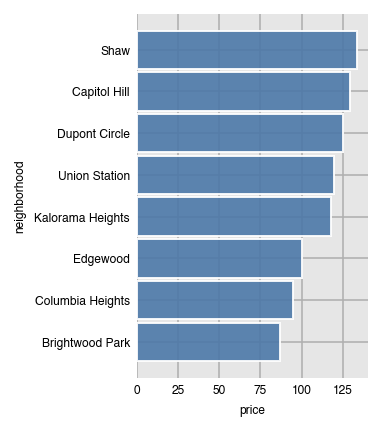

In [15]:
dxp.bar(x='price', y='neighborhood', data=airbnb, aggfunc='median', 
        orientation='h', sort_values='desc')

Switching orientation is possible for most other plots.

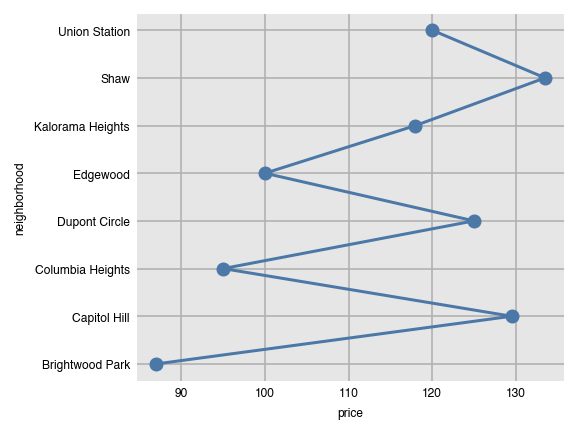

In [16]:
dxp.line(x='price', y='neighborhood', data=airbnb, aggfunc='median', orientation='h')

### Split bars into groups

You can split each bar into further groups by setting the `split` parameter to another column.

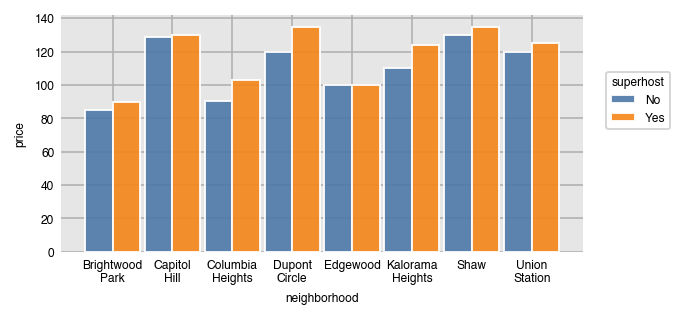

In [17]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', split='superhost')

We can use the `pivot_table` method to verify the results in pandas.

In [18]:
airbnb.pivot_table(index='superhost', columns='neighborhood', 
                   values='price', aggfunc='median')

neighborhood,Brightwood Park,Capitol Hill,Columbia Heights,Dupont Circle,Edgewood,Kalorama Heights,Shaw,Union Station
superhost,,,,,,,,
No,85.0,129.0,90.5,120.0,100.0,110.0,130.0,120.0
Yes,90.0,130.0,103.0,135.0,100.0,124.0,135.0,125.0


Set the order of the unique split values with `split_order`, which can also act as a filter.

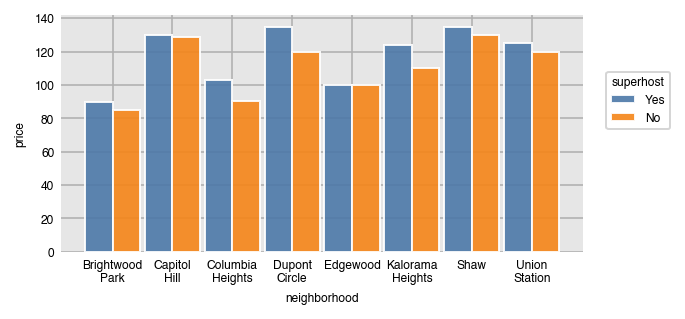

In [19]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', 
        split='superhost', split_order=['Yes', 'No'])

Like all the `_order` parameters, `split_order` defaults to `'asc'` (alphabetical) order. Set it to `'desc'` for the opposite.

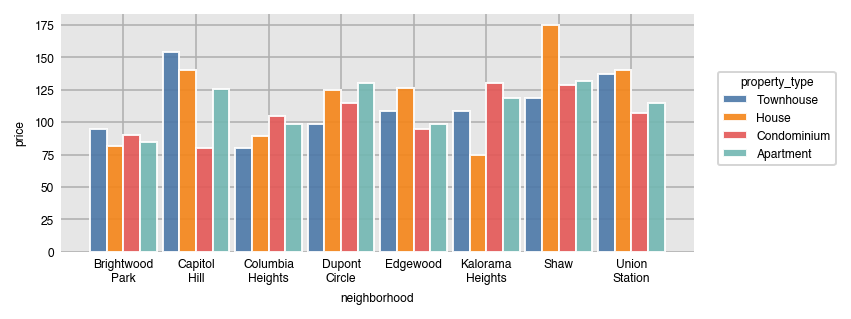

In [20]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median',
        split='property_type', split_order='desc')

Filtering for the most/least frequent split categories is possible.

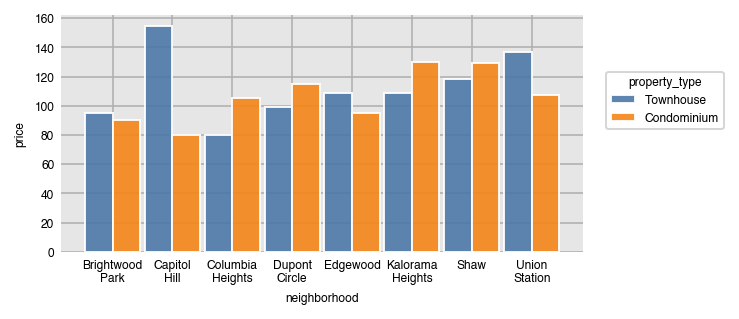

In [21]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', 
        split='property_type', split_order='bottom 2')

Verifying that the least frequent property types are Townhouse and Condominium.

In [22]:
airbnb['property_type'].value_counts()

Apartment      2403
House           877
Townhouse       824
Condominium     477
Name: property_type, dtype: int64

### Stacked bar charts

Stack all the split groups one on top of the other by setting `stacked` to `True`.

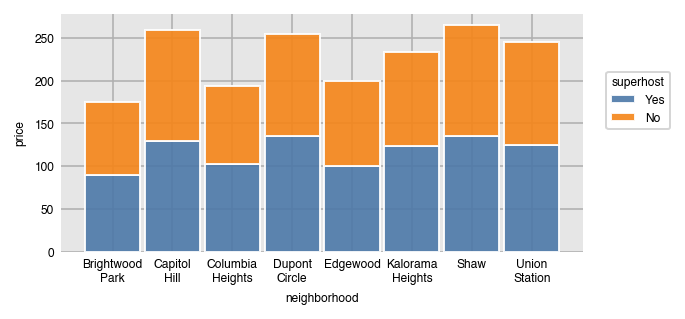

In [23]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', 
        split='superhost', split_order=['Yes', 'No'], stacked=True)

### Split into multiple plots

It's possible to split the data further into separate plots by the unique values in a different column with the `row` and `col` parameters. Here, each kind of `property_type` has its own plot.

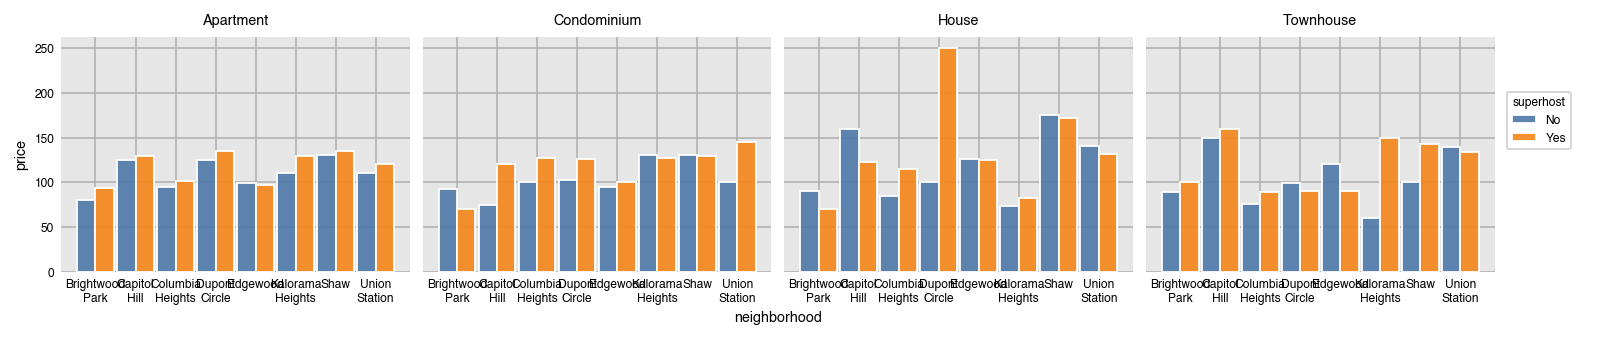

In [24]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', 
        split='superhost', col='property_type')

If there isn't room for all of the plots, set the `wrap` parameter to an integer to set the maximum number of plots per row/col. We also specify the `col_order` to be descending alphabetically.

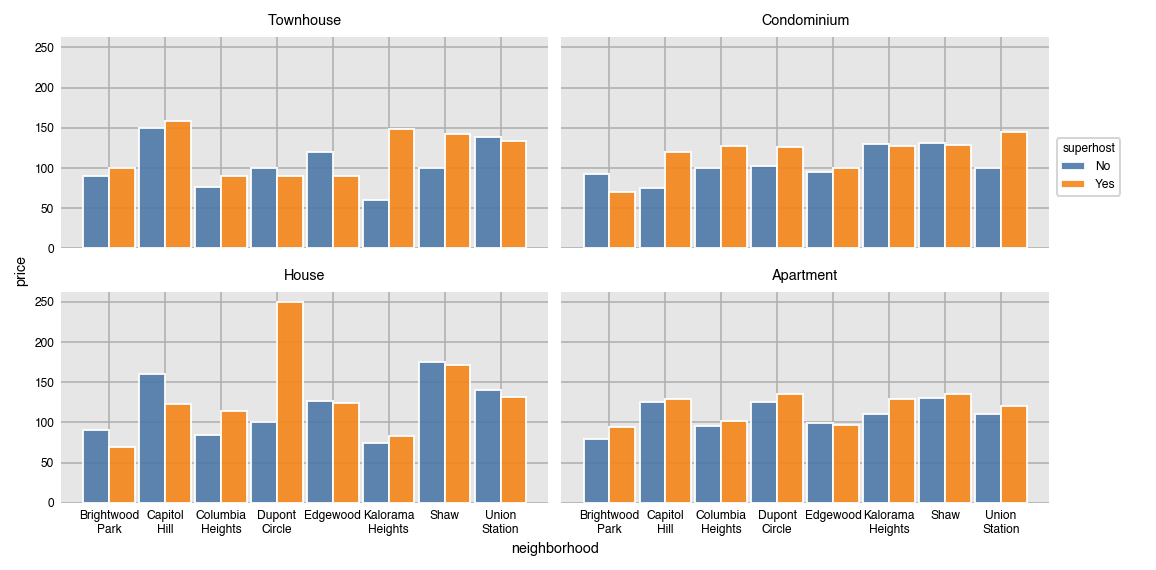

In [25]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', 
        split='superhost', col='property_type', wrap=2, col_order='desc')

Use `col_order` to both filter and set a specific order for the plots.

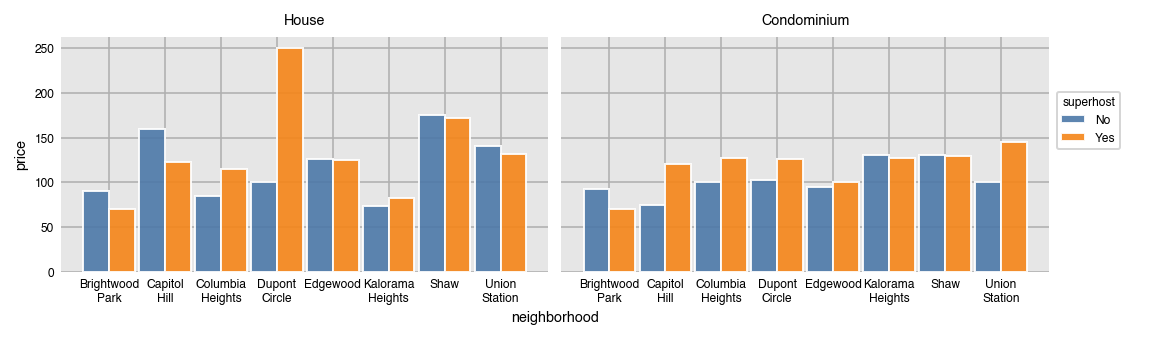

In [26]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median',
        split='superhost', col='property_type', col_order=['House', 'Condominium'])

Splits can be made simultaneously along row and columns.

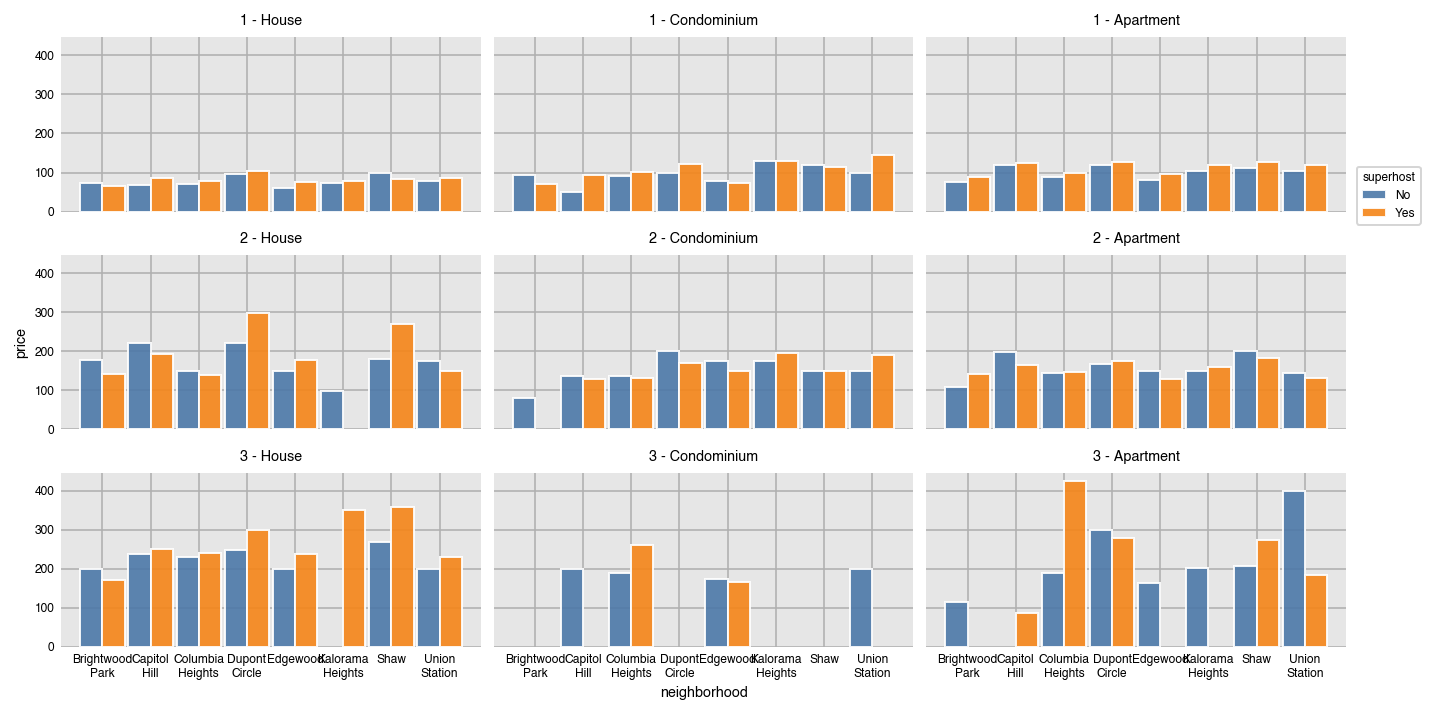

In [27]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', split='superhost', 
        col='property_type', col_order=['House', 'Condominium', 'Apartment'],
        row='bedrooms', row_order=[1, 2, 3])

By default, all axis limits are shared. Allow each plot to set its own limits by setting `sharex` and `sharey` to `False`.

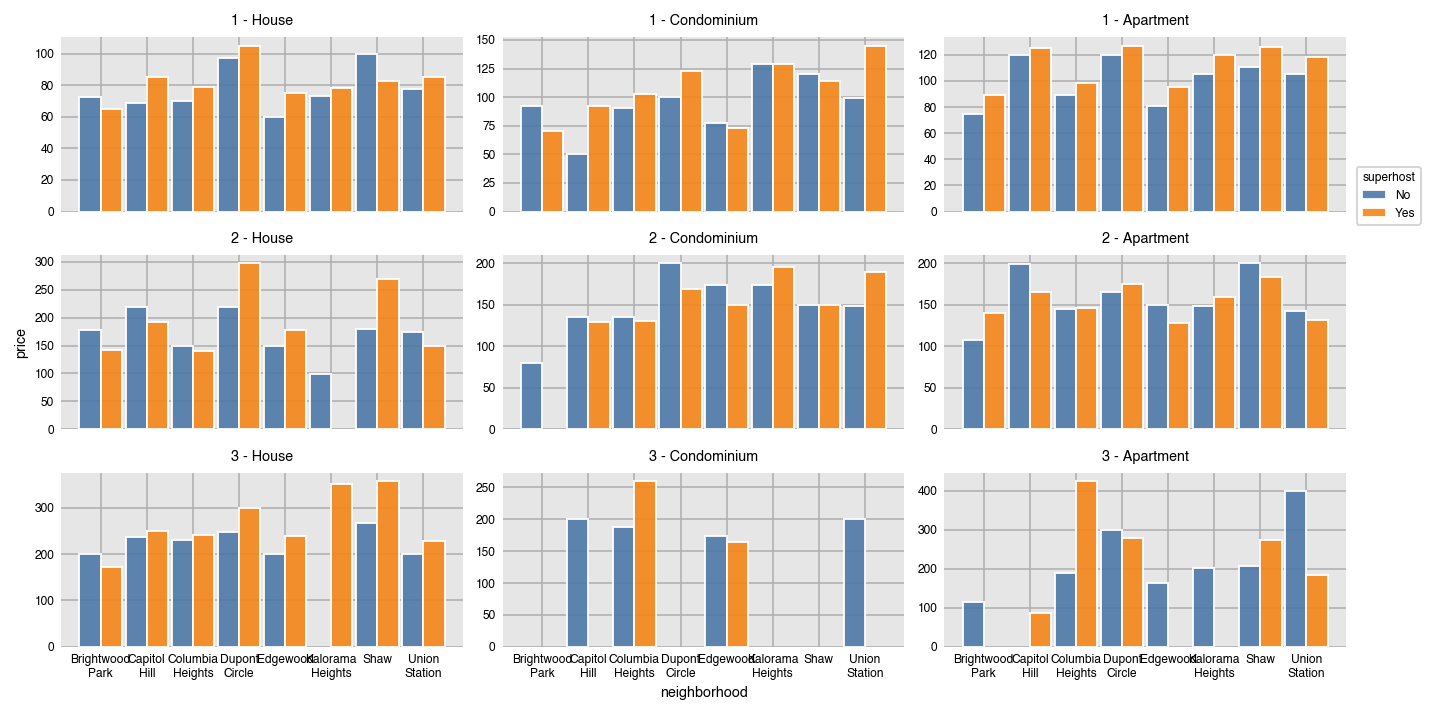

In [28]:
dxp.bar(x='neighborhood', y='price', data=airbnb, aggfunc='median', split='superhost', 
        col='property_type', col_order=['House', 'Condominium', 'Apartment'],
        row='bedrooms', row_order=[1, 2, 3], sharey=False)

### Set the width of each bar with `size`

The width (height when horizontal) of the bars is set with the `size` parameter. By default, this value is .9. Think of this number as the relative width of all the bars for a particular x/y value, where 1 is the distance between each x/y value.

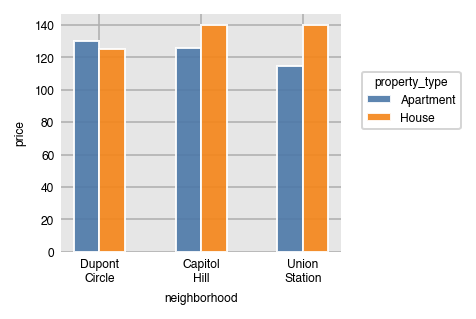

In [29]:
dxp.bar(x='neighborhood', y='price', data=airbnb, 
        aggfunc='median', split='property_type',
        split_order=['Apartment', 'House'], 
        x_order=['Dupont Circle', 'Capitol Hill', 'Union Station'], size=.5)

### Splitting line plots

All the other aggregating plots work similarly.

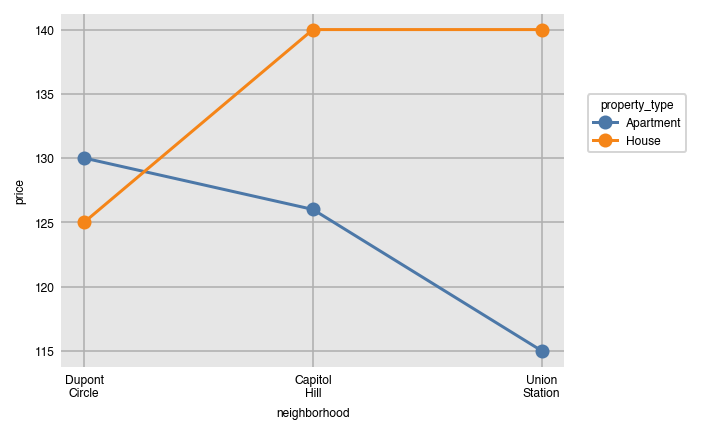

In [30]:
dxp.line(x='neighborhood', y='price', data=airbnb, 
        aggfunc='median', split='property_type',
        split_order=['Apartment', 'House'], 
        x_order=['Dupont Circle', 'Capitol Hill', 'Union Station'])

## Distribution plots - box, violin, histogram, kde

Distribution plots work similarly, but do not have an `aggfunc` since they do not aggregate. They take their group of values and draw some kind of shape that gives information on how that variable is distributed. 

### Box plots

Box plots have colored boxes with ends at the first and third quartiles and a line at the median. The whiskers are placed at 1.5 times the difference between the third and first quartiles (Interquartile range (IQR)). Fliers are the points outside this range and plotted individually. By default, both box and violin plots are plotted horizontally.

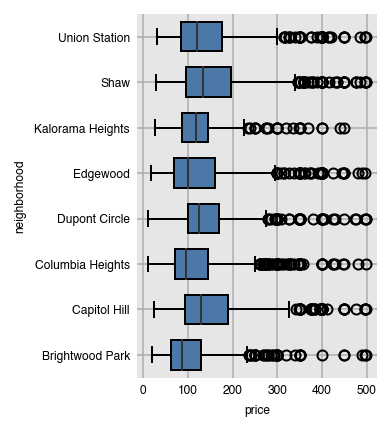

In [31]:
dxp.box(x='price', y='neighborhood', data=airbnb)

Split the groups in the same manner as with the aggregation plots.

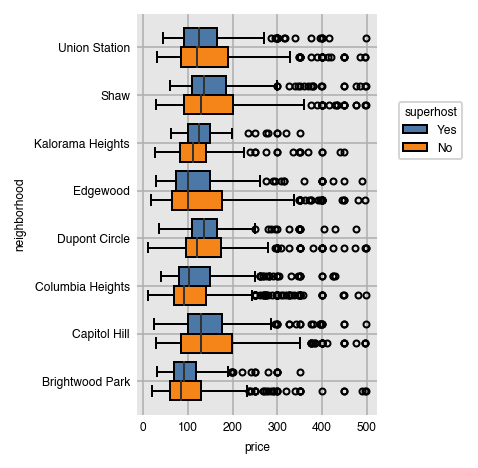

In [32]:
dxp.box(x='price', y='neighborhood', data=airbnb, 
        split='superhost', split_order=['Yes', 'No'])

Order the appearance of the splits alphabetically (in descending order here).

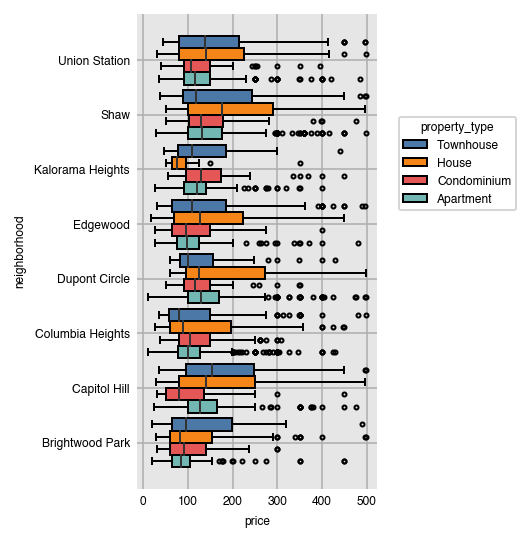

In [33]:
dxp.box(x='price', y='neighborhood', data=airbnb, 
        split='property_type', split_order='desc')

### Filter range of values with `x_order`

It's possible to filter the range of possible values by passing in a list of the minimum and maximum to `x_order`.

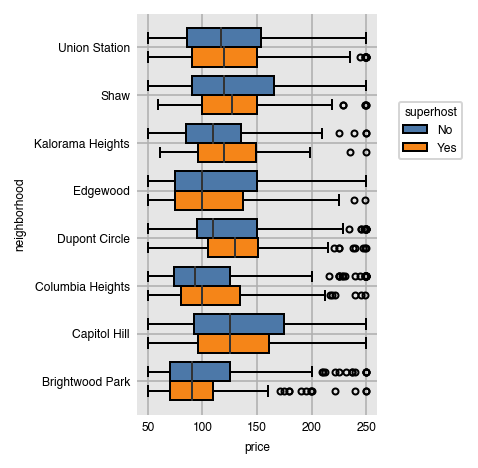

In [34]:
dxp.box(x='price', y='neighborhood', data=airbnb, 
        split='superhost', x_order=[50, 250])

Change the `x` and `y` while setting `orientation` to make vertical bar plots.

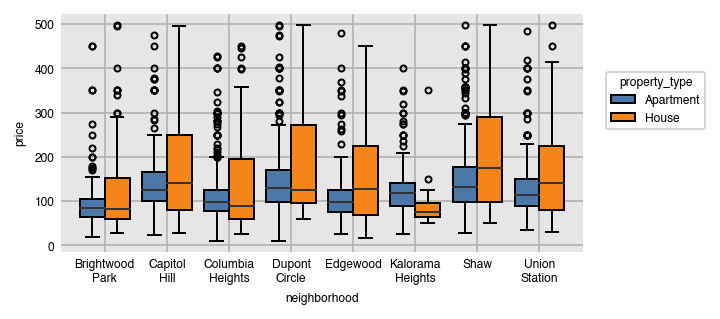

In [35]:
dxp.box(x='neighborhood', y='price', data=airbnb, orientation='v',
        split='property_type', split_order='top 2')

Violin plots work identically to box plots, but show "violins", kernel density plots duplicated on both sides of a line.

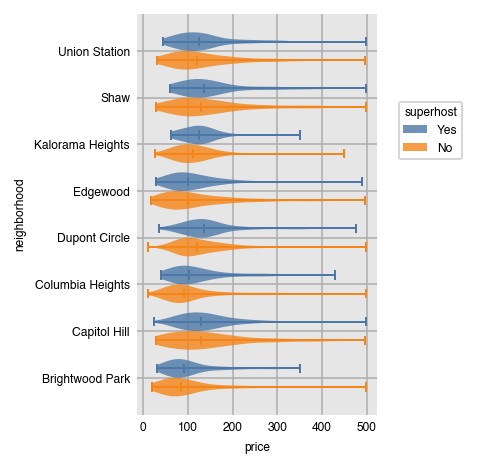

In [36]:
dxp.violin(x='price', y='neighborhood', data=airbnb, 
          split='superhost', split_order=['Yes', 'No'])

Splitting by rows and columns is possible as well with distribution plots.

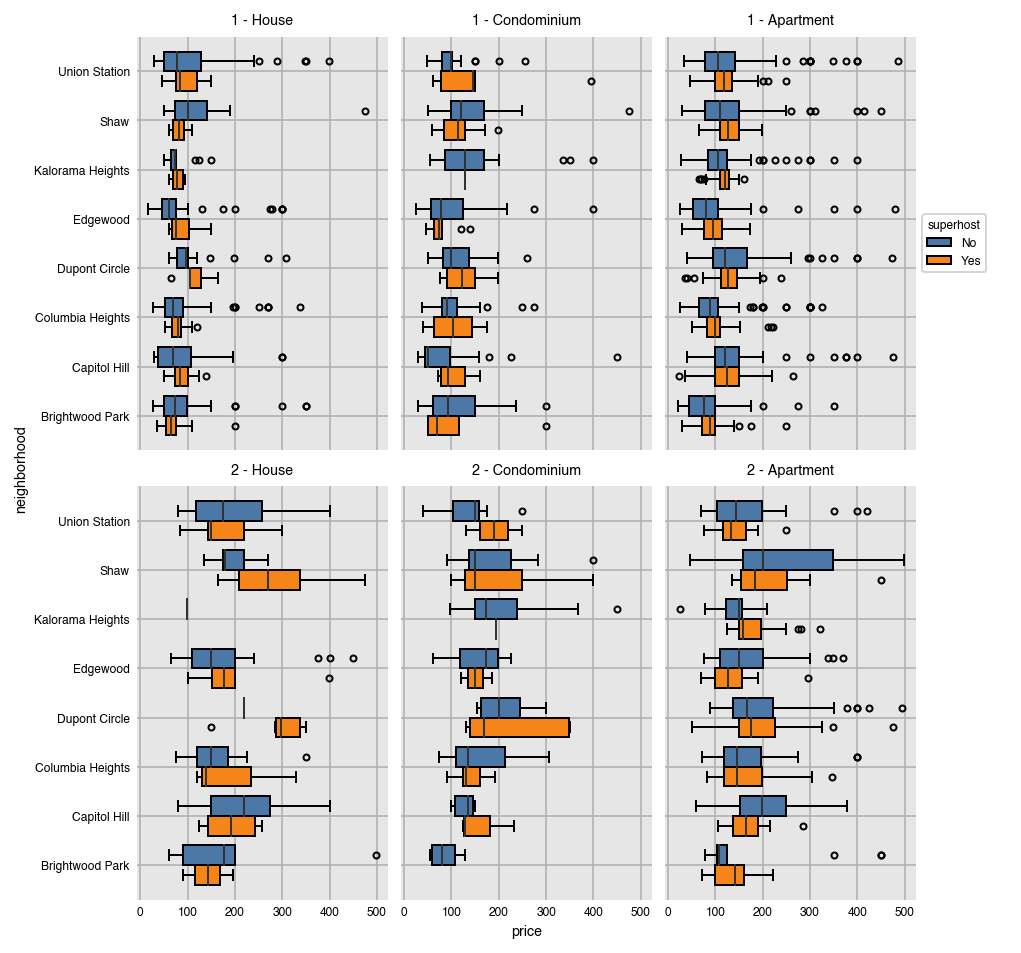

In [37]:
dxp.box(x='price', y='neighborhood', data=airbnb,split='superhost', 
        col='property_type', col_order=['House', 'Condominium', 'Apartment'],
        row='bedrooms', row_order=[1, 2])

### Histograms

Histograms work in a slightly different manner. Instead of passing both `x` and `y`, you give it a single numeric column. A vertical histogram with 20 bins of the counts is created by default.

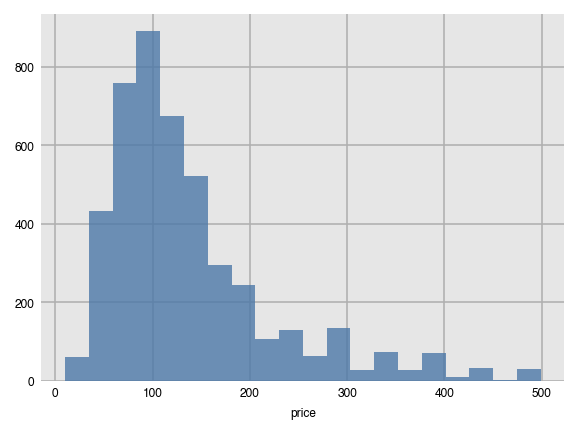

In [38]:
dxp.hist(val='price', data=airbnb)

We can use `split` just like we did above and also create horizontal histograms.

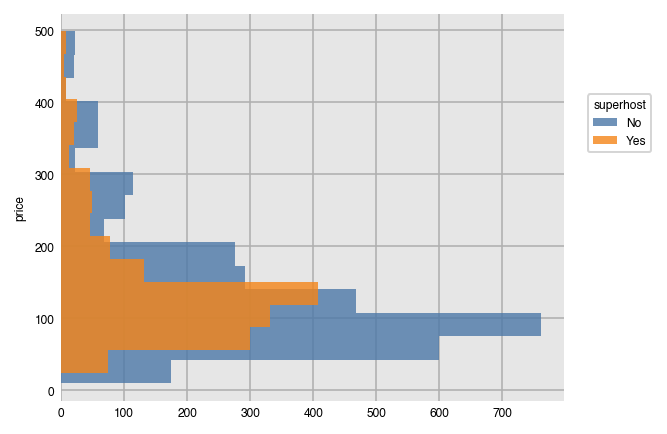

In [39]:
dxp.hist(val='price', data=airbnb, orientation='h', split='superhost', bins=15)

Here, we customize our histogram by plotting the cumulative density as opposed to the raw frequency count using the outline of the bars ('step').

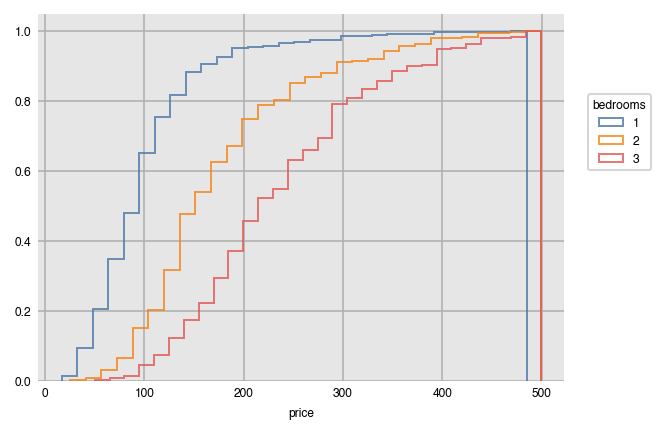

In [40]:
dxp.hist(val='price', data=airbnb, split='bedrooms', split_order=[1, 2, 3], 
         bins=30, density=True, histtype='step', cumulative=True)

### KDE Plots

Kernel density estimates provide an estimate for the probability distribution of a continuous variable. Here, we examine how price is distributed by bedroom.

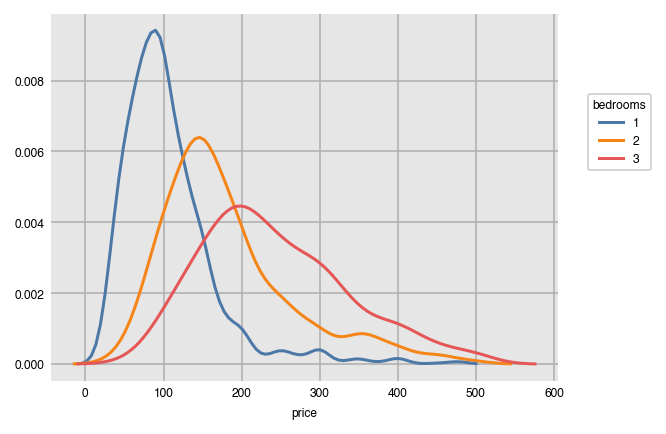

In [41]:
dxp.kde(x='price', data=airbnb, split='bedrooms', split_order=[1, 2, 3])

Graph the cumulative distribution instead on multiple plots.

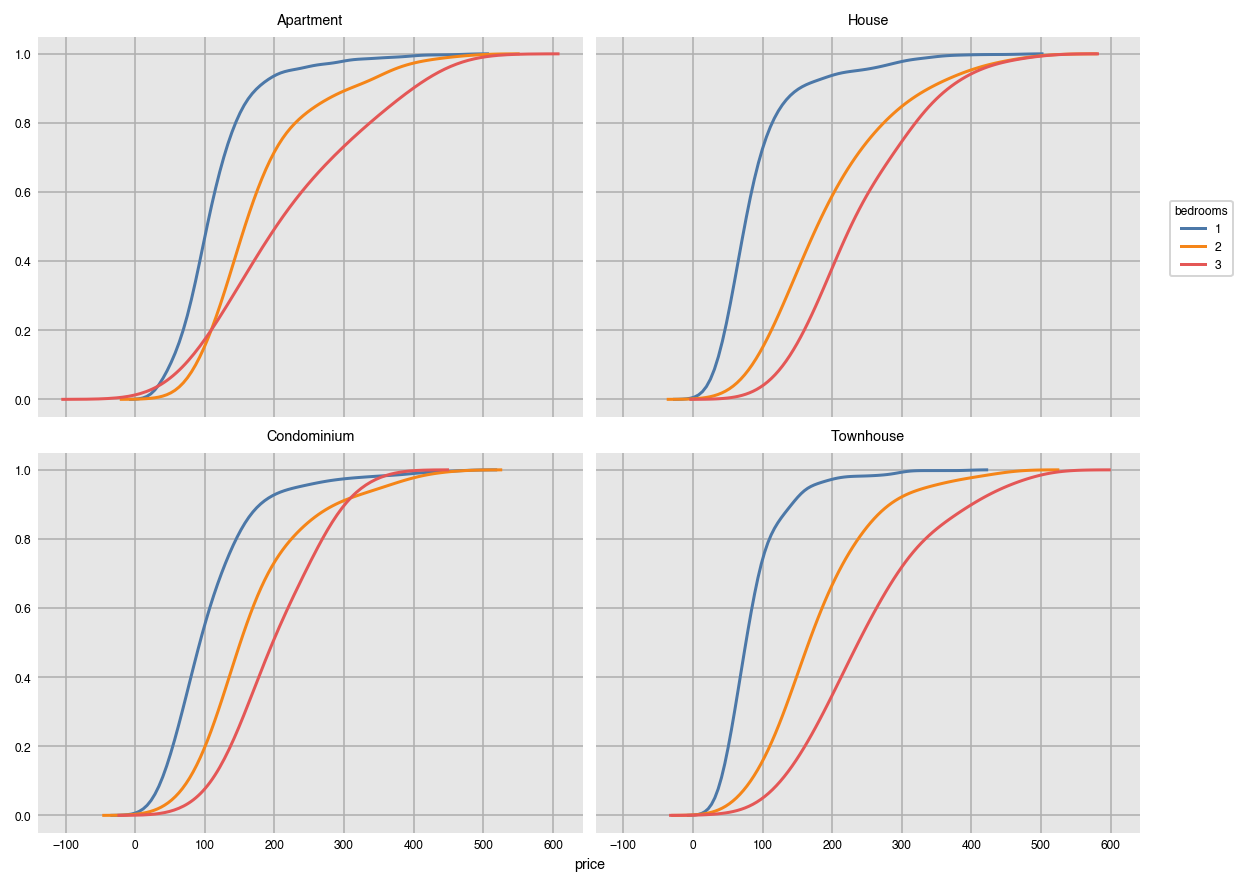

In [42]:
dxp.kde(x='price', data=airbnb, split='bedrooms', 
        split_order=[1, 2, 3], cumulative=True, col='property_type', wrap=2)

### Two-dimensional KDE's

Provide two numeric columns to `x` and `y` to get a two dimensional KDE.

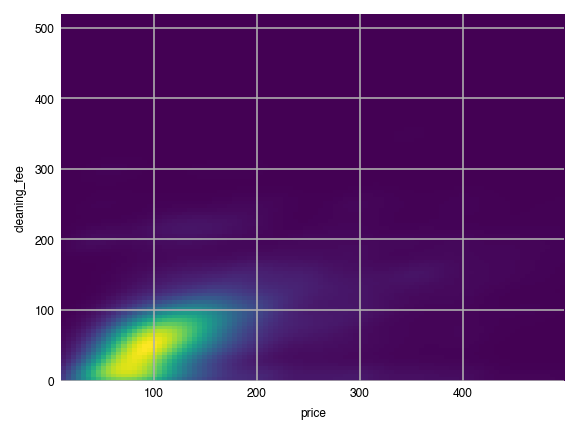

In [43]:
dxp.kde(x='price', y='cleaning_fee', data=airbnb)

Create a grid of two-dimensional KDE's.

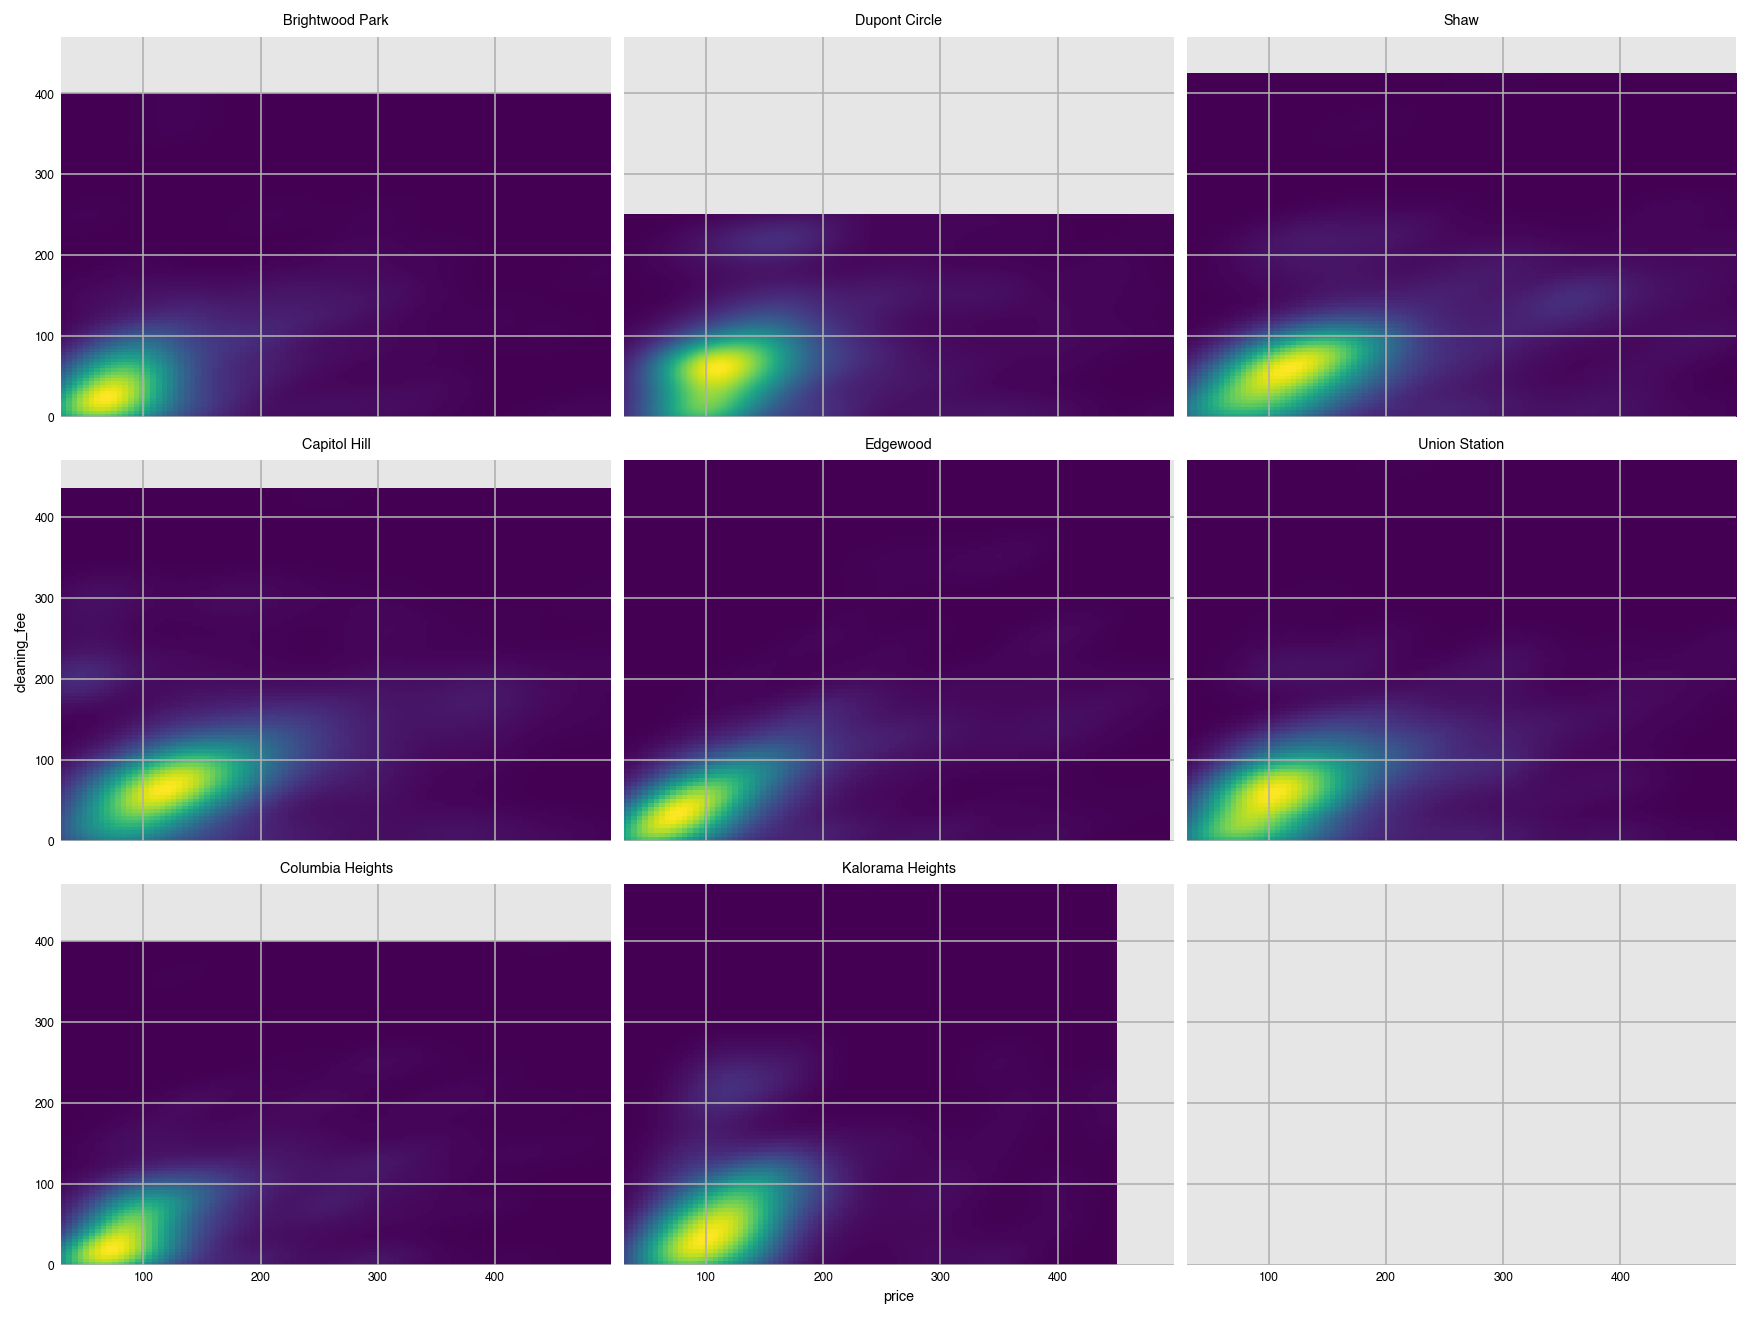

In [44]:
dxp.kde(x='price', y='cleaning_fee', data=airbnb, row='neighborhood', wrap=3)

## Count plots

The `count` function graphs the frequency of unique values as bars. By default, it plots the values in descending order.

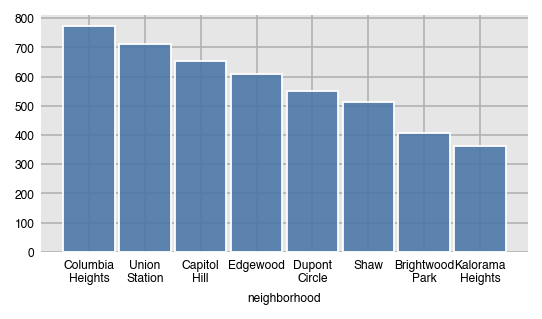

In [45]:
dxp.count(val='neighborhood', data=airbnb)

In pandas, this is a straightforward call to the `value_counts` method.

In [46]:
airbnb['neighborhood'].value_counts()

Columbia Heights    773
Union Station       713
Capitol Hill        654
Edgewood            610
Dupont Circle       549
Shaw                514
Brightwood Park     406
Kalorama Heights    362
Name: neighborhood, dtype: int64

### Relative frequency with `normalize`

Instead of the raw counts, get the relative frequency by setting normalize to `True`.

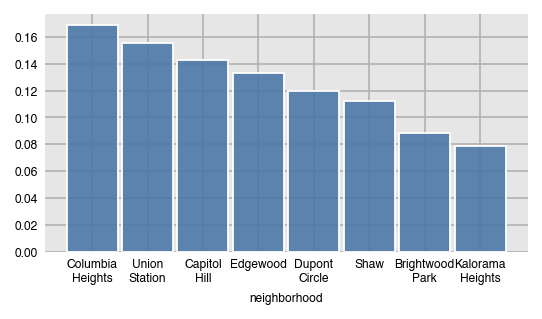

In [47]:
dxp.count(val='neighborhood', data=airbnb, normalize=True)

Here, we split by property type.

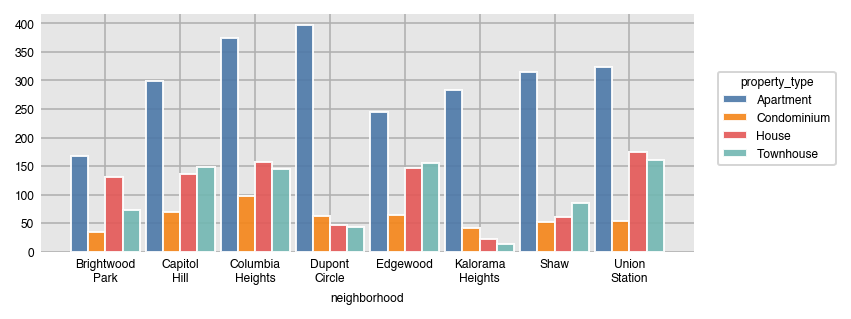

In [48]:
dxp.count(val='neighborhood', data=airbnb, split='property_type')

In pandas, this is done with the `crosstab` function.

In [49]:
pd.crosstab(index=airbnb['property_type'], columns=airbnb['neighborhood'])

neighborhood,Brightwood Park,Capitol Hill,Columbia Heights,Dupont Circle,Edgewood,Kalorama Heights,Shaw,Union Station
property_type,,,,,,,,
Apartment,167,299,374,397,244,284,315,323
Condominium,35,70,97,62,65,42,52,54
House,131,137,157,47,146,23,61,175
Townhouse,73,148,145,43,155,13,86,161


Horizontal stacked count plots.

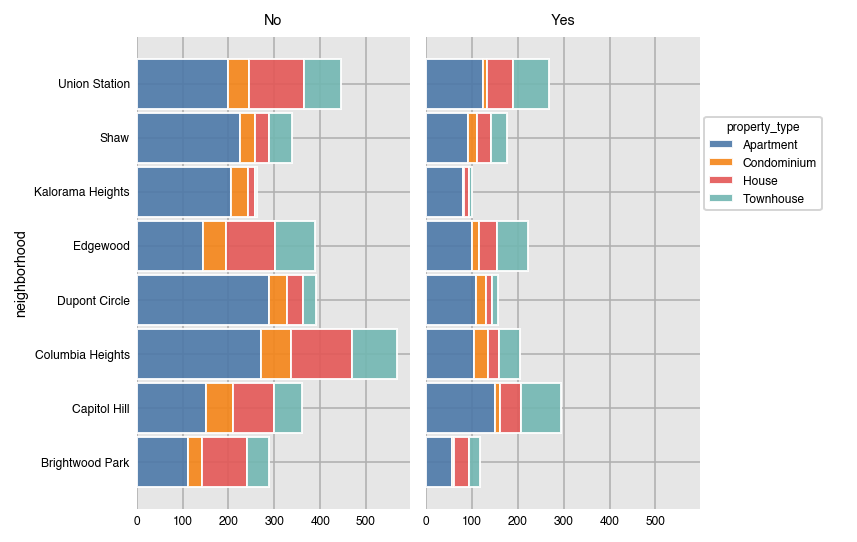

In [50]:
dxp.count(val='neighborhood', data=airbnb, split='property_type', 
          orientation='h', stacked=True, col='superhost')

### Normalize over different variables

Setting `normalize` to `True`, returns the relative frequency with respect to all of the data. You can normalize over any of the variables provided.

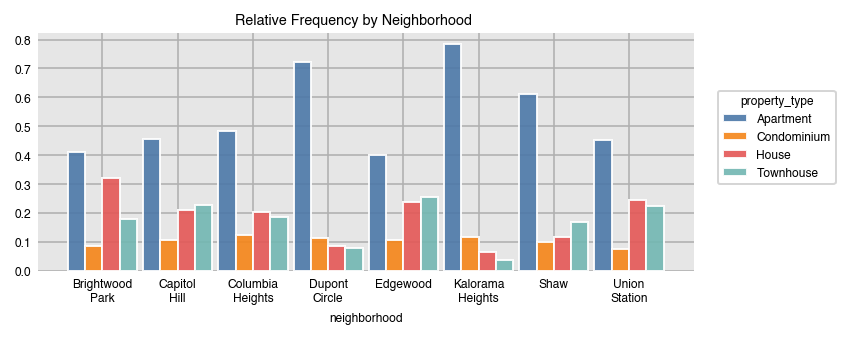

In [51]:
dxp.count(val='neighborhood', data=airbnb, split='property_type', normalize='neighborhood', 
                title='Relative Frequency by Neighborhood')

Normalize over several variables at once with a list.

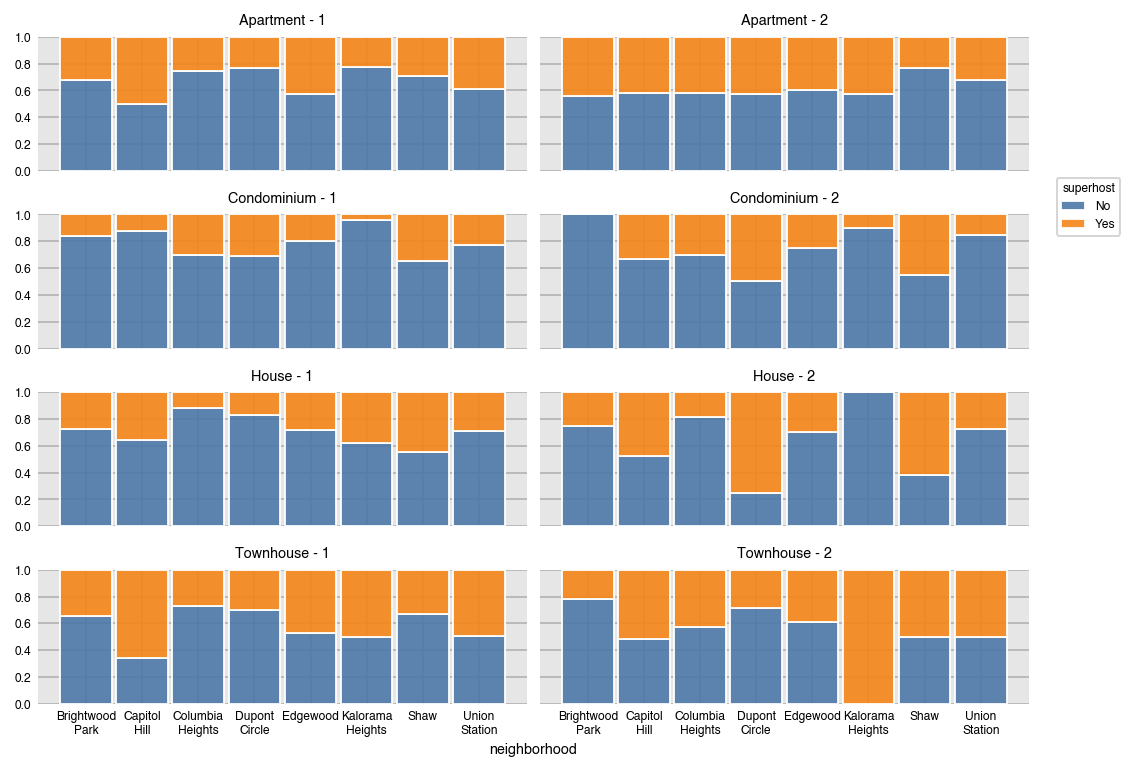

In [52]:
dxp.count(val='neighborhood', data=airbnb, split='superhost', 
          row='property_type', col='bedrooms', col_order=[1, 2],
          normalize=['neighborhood', 'property_type', 'bedrooms'], stacked=True)

## Wide data

Dexplot can also plot wide data, or data where no aggregation happens. Here is a scatter plot of the location of each listing.

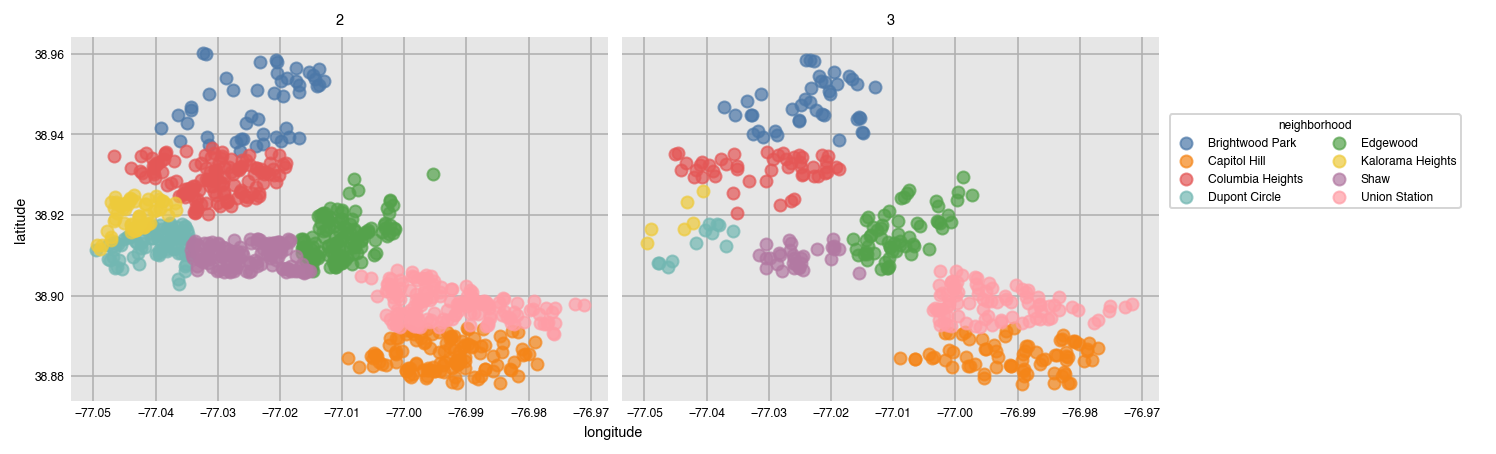

In [53]:
dxp.scatter(x='longitude', y='latitude', data=airbnb, 
            split='neighborhood', col='bedrooms', col_order=[2, 3])

If you've already aggregated your data, you can plot it directly without specifying `x` or `y`.

In [54]:
df = airbnb.pivot_table(index='neighborhood', columns='property_type', 
                        values='price', aggfunc='mean')
df

property_type,Apartment,Condominium,House,Townhouse
neighborhood,,,,
Brightwood Park,96.119760,105.000000,121.671756,133.479452
Capitol Hill,141.210702,104.200000,170.153285,184.459459
Columbia Heights,114.676471,126.773196,135.292994,124.358621
Dupont Circle,146.858942,130.709677,179.574468,139.348837
Edgewood,108.508197,112.846154,156.335616,147.503226
Kalorama Heights,122.542254,155.928571,92.695652,158.230769
Shaw,153.888889,158.500000,202.114754,173.279070
Union Station,128.458204,133.833333,162.748571,162.167702


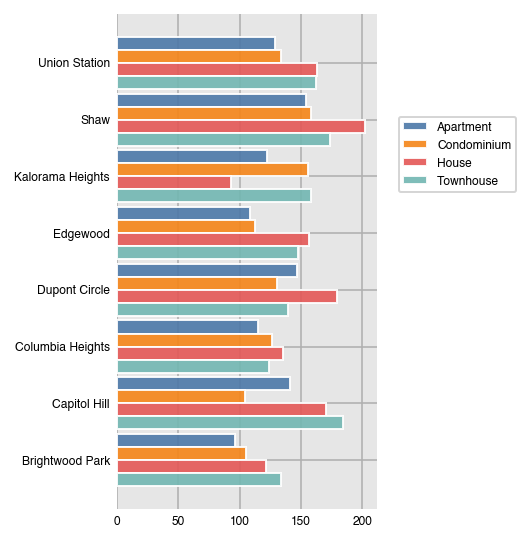

In [55]:
dxp.bar(data=df, orientation='h')

### Time series

In [56]:
stocks = pd.read_csv('../data/stocks10.csv', parse_dates=['date'], index_col='date')
stocks.head()

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN
1999-10-28,29.01,2.43,16.59,71.00,NaN,21.19,38.85,19.79,NaN,NaN
1999-10-29,29.88,2.50,17.21,70.62,NaN,21.47,39.25,20.00,NaN,NaN


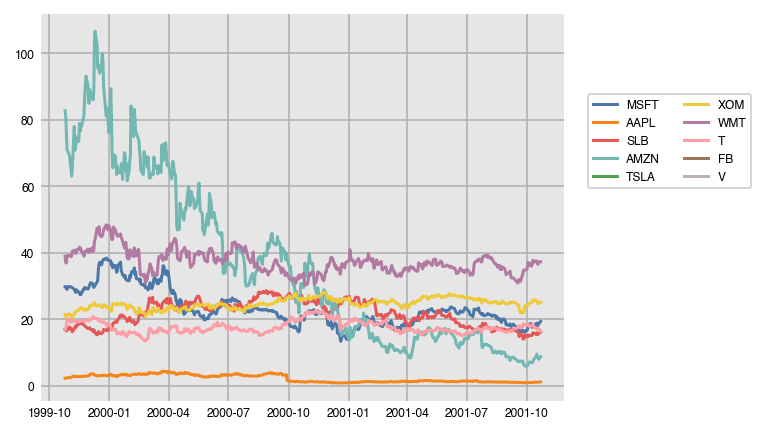

In [57]:
dxp.line(data=stocks.head(500))